In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('bmh')

%matplotlib inline

In [85]:
import bz2
import os
import ujson
import attr
import math

import pandas as pd
import numpy as np

from glob import glob
from tqdm import tqdm
from itertools import islice
from collections import OrderedDict, defaultdict
from pyemd import emd
from boltons.iterutils import pairwise
from collections import Counter

from sklearn.cluster import AgglomerativeClustering
from scipy import stats

In [5]:
@attr.s
class Dataset:
    
    root = attr.ib()
    
    def paths(self):
        return glob(os.path.join(self.root, '*.bz2'))
    
    def novels(self):
        for path in tqdm(self.paths()):
            with bz2.open(path) as fh:
                for line in fh:
                    yield ujson.loads(line)

In [6]:
ds = Dataset('../../data/top200-100b.json/')

In [7]:
df = pd.DataFrame(ds.novels())

100%|██████████| 100/100 [01:25<00:00,  1.17it/s]


In [57]:
def plot_metadata_slices(token):
    
    plt.figure(figsize=(8,8), dpi=100)
    
    plt.rc('axes', labelsize=16)
    plt.rc('axes', titlesize=20)
    
    plt.title(f'"{token}"')
    
    plt.xlabel('Narrative time')
    plt.ylabel('Relative frequency')

    decade_splits = [
        (f'{y1}-{y2}', df[(df.pub_year >= y1) & (df.pub_year < y2)])
        for y1, y2 in pairwise(range(1850, 2001, 30))
    ]

    splits = OrderedDict([
        ('Gale', df[df.corpus=='gale']),
        ('Chicago', df[df.corpus=='chicago']),
        ('Male Authored', df[df.chicago_auth_gender=='M']),
        ('Female Authored', df[df.chicago_auth_gender=='F']),
        ('Canonical', df[df.chicago_auth_canon==True]),
        ('Non-Canonical', df[df.chicago_auth_canon==False]),
        *decade_splits,
        ('# Libraries < 500', df[df.chicago_libraries<500]),
        ('# Libraries 500-1000', df[(df.chicago_libraries>500) & (df.chicago_libraries<1000)]),
        ('# Libraries 1000+', df[df.chicago_libraries>1000]),
    ])

    for label, split in splits.items():
        series = np.stack(c[token] for c in split['counts']).sum(0)
        plt.plot(series / series.sum(), label=f'{label}  ({len(split)})', linewidth=1.5)
        
    plt.legend(bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0)

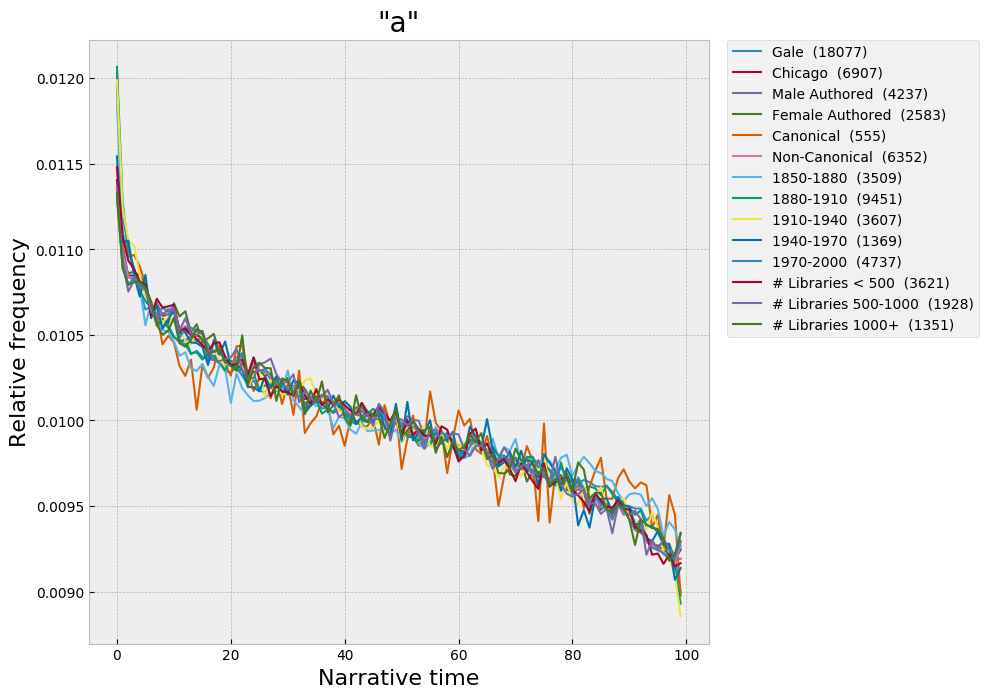

In [19]:
plot_metadata_slices('a')

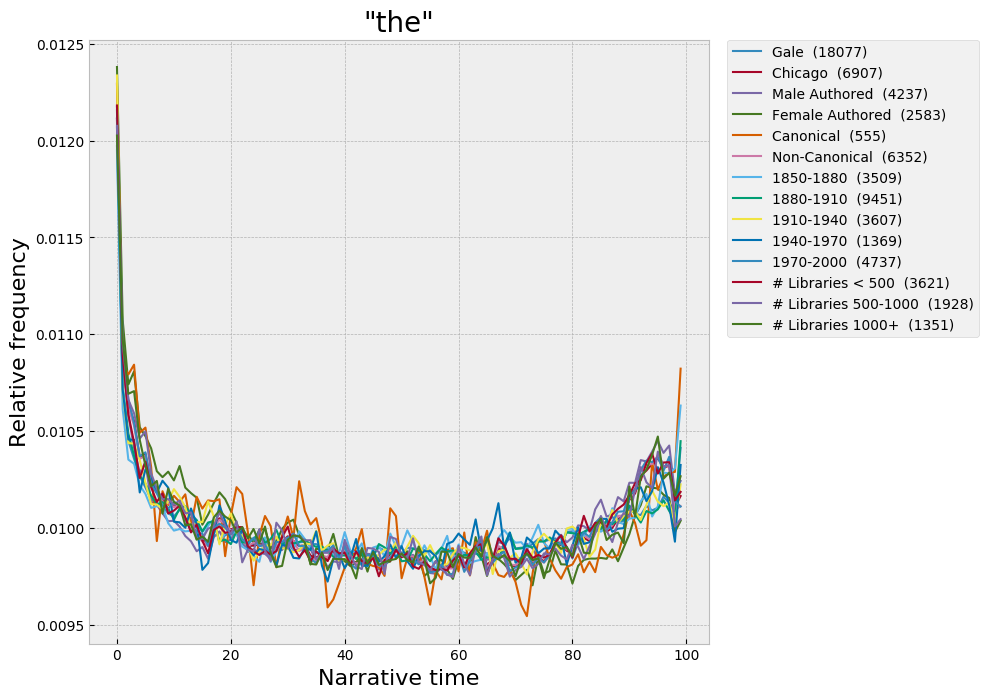

In [18]:
plot_metadata_slices('the')

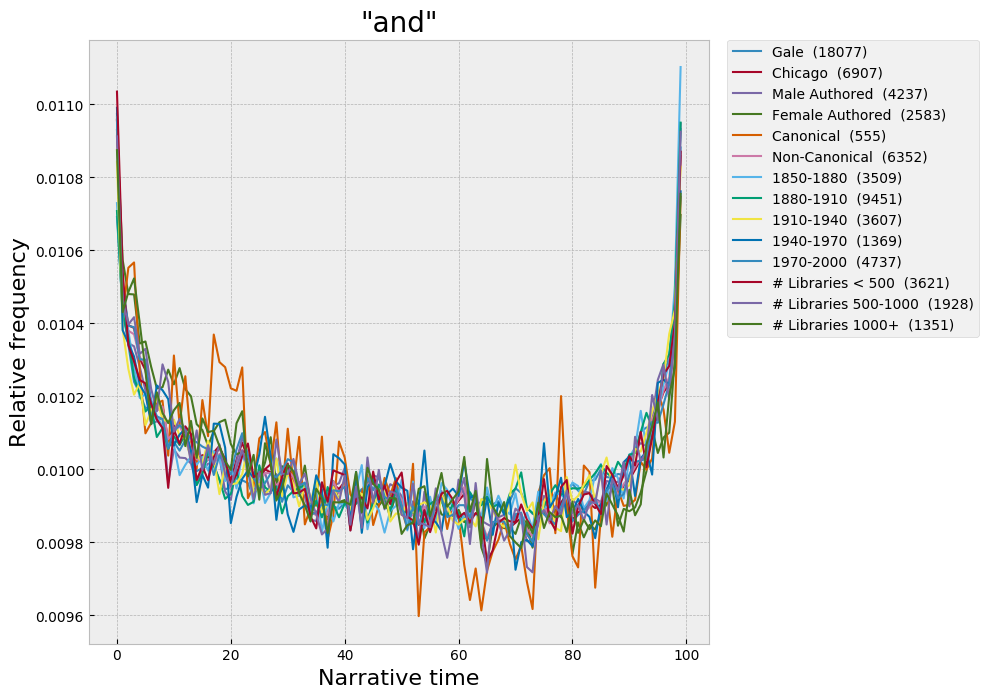

In [20]:
plot_metadata_slices('and')

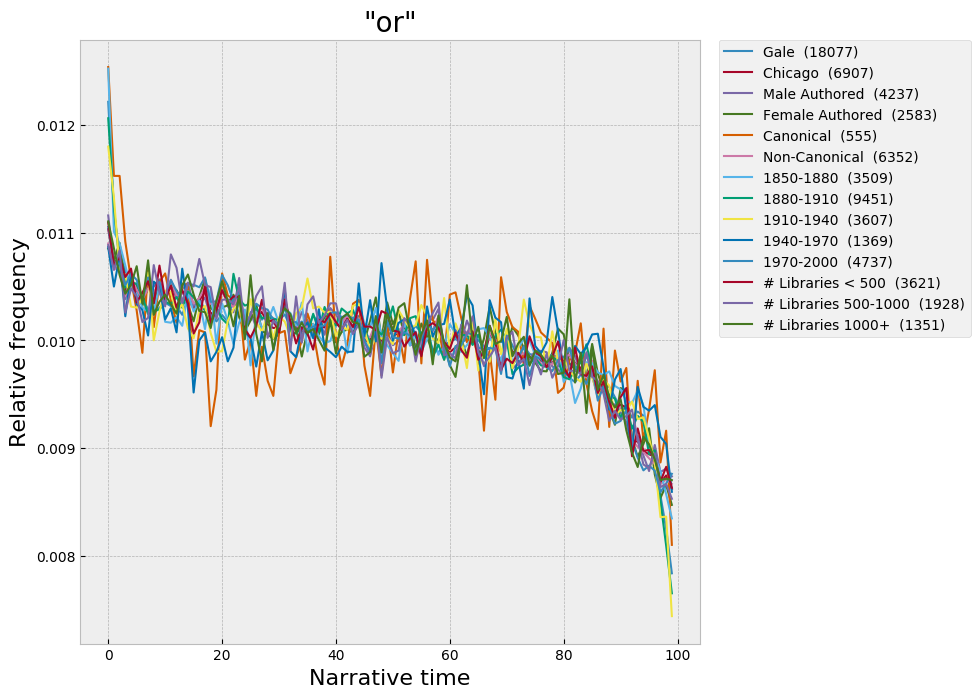

In [21]:
plot_metadata_slices('or')

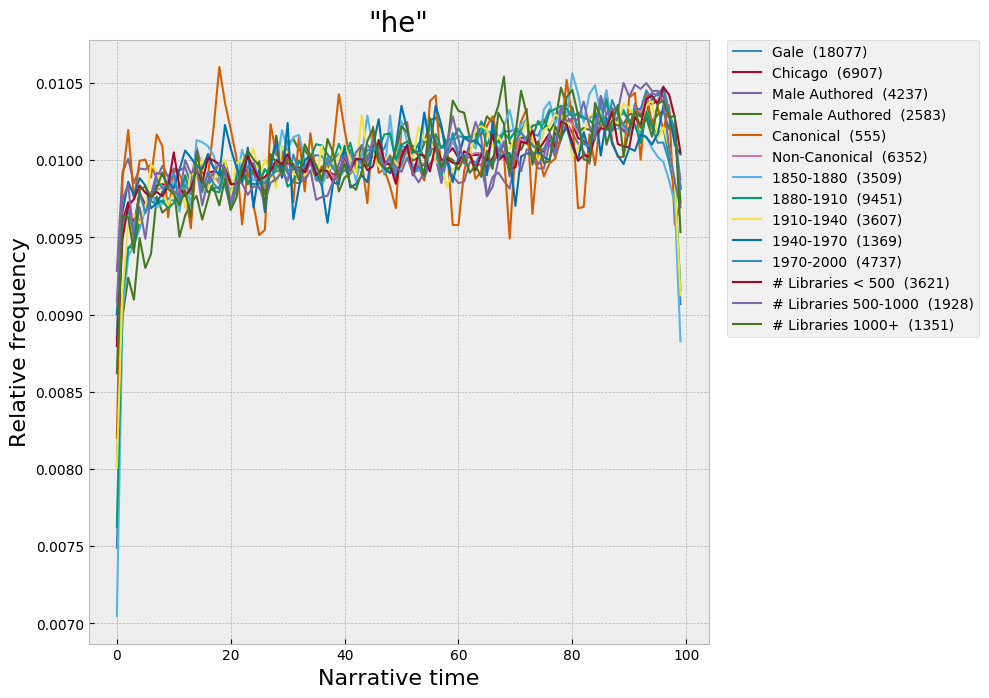

In [22]:
plot_metadata_slices('he')

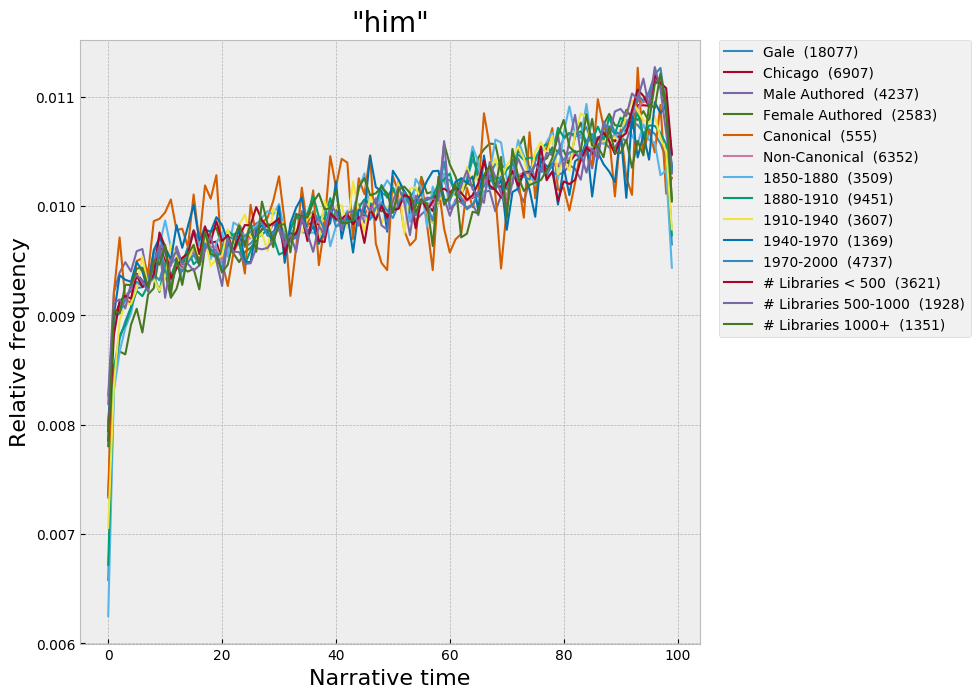

In [23]:
plot_metadata_slices('him')

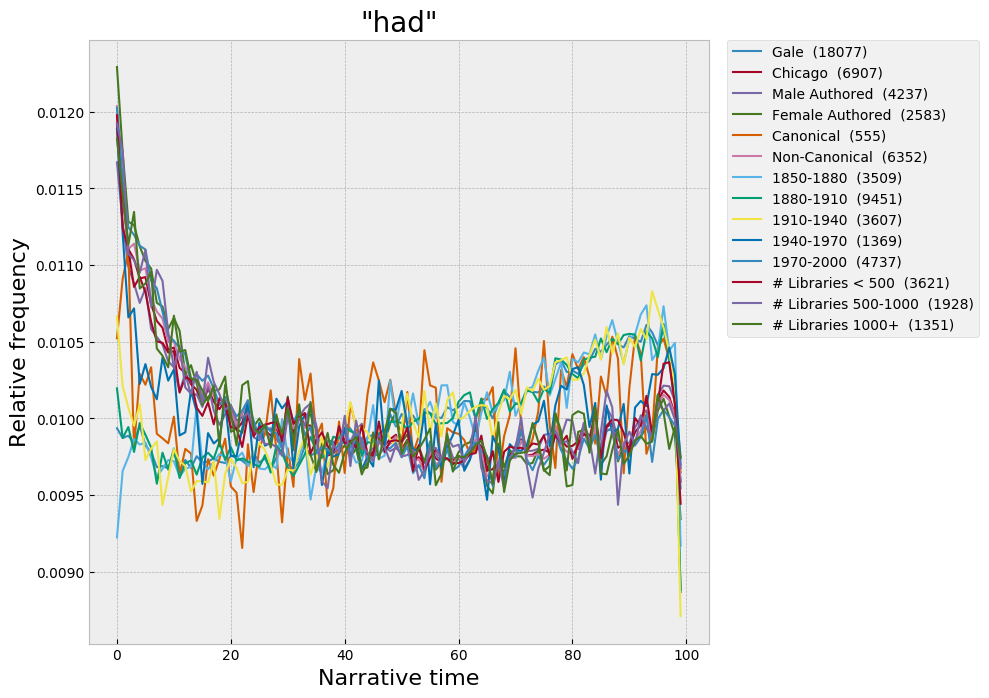

In [24]:
plot_metadata_slices('had')

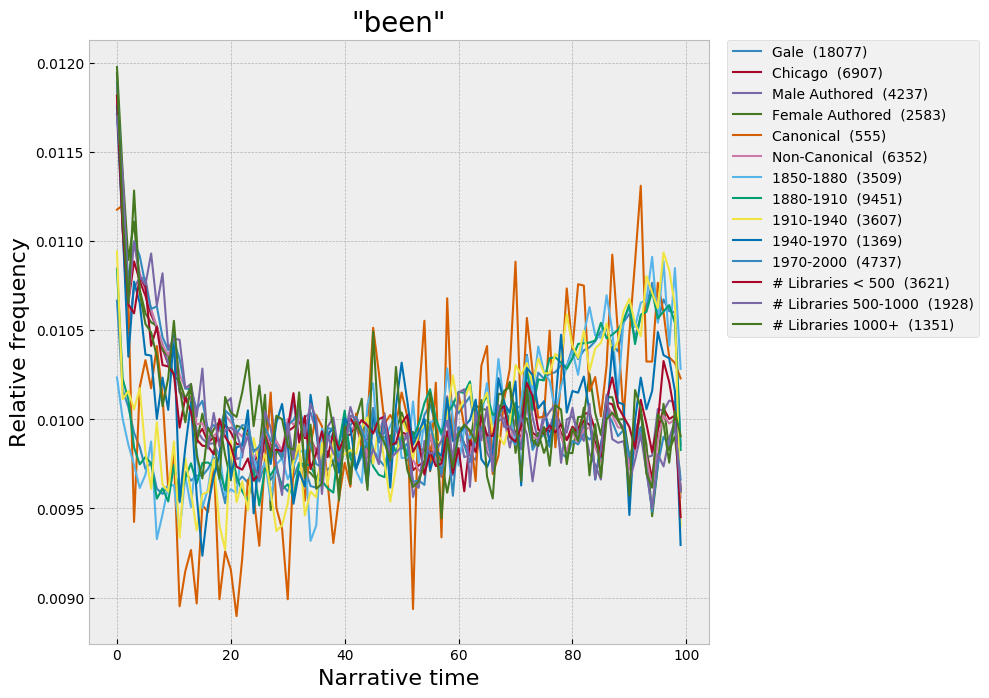

In [25]:
plot_metadata_slices('been')

In [92]:
def plot_historical_slices(token, w=8, h=8, labelsize=16, titlesize=20):
    
    fig = plt.figure(figsize=(w,h), dpi=100)
    ax = fig.add_subplot(111)
    
    plt.rc('axes', labelsize=labelsize)
    plt.rc('axes', titlesize=titlesize)
    
    plt.title(f'"{token}"')
    
    plt.xlabel('Narrative time')
    plt.ylabel('Relative frequency')
    
    cm = plt.get_cmap('plasma')
    
    years = range(1850, 2001, 20)
    
    colors = [
        cm(1.*i/len(years))
        for i in range(len(years))
    ]
    
    ax.set_prop_cycle('color', colors)

    splits = [
        (f'{y1}-{y2}', df[(df.pub_year >= y1) & (df.pub_year < y2)])
        for y1, y2 in pairwise(years)
    ]

    for label, split in splits:
        series = np.stack(c[token] for c in split['counts']).sum(0)
        plt.plot(series / series.sum(), label=f'{label}  ({len(split)})', linewidth=1.5)
        
    plt.legend(bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0)

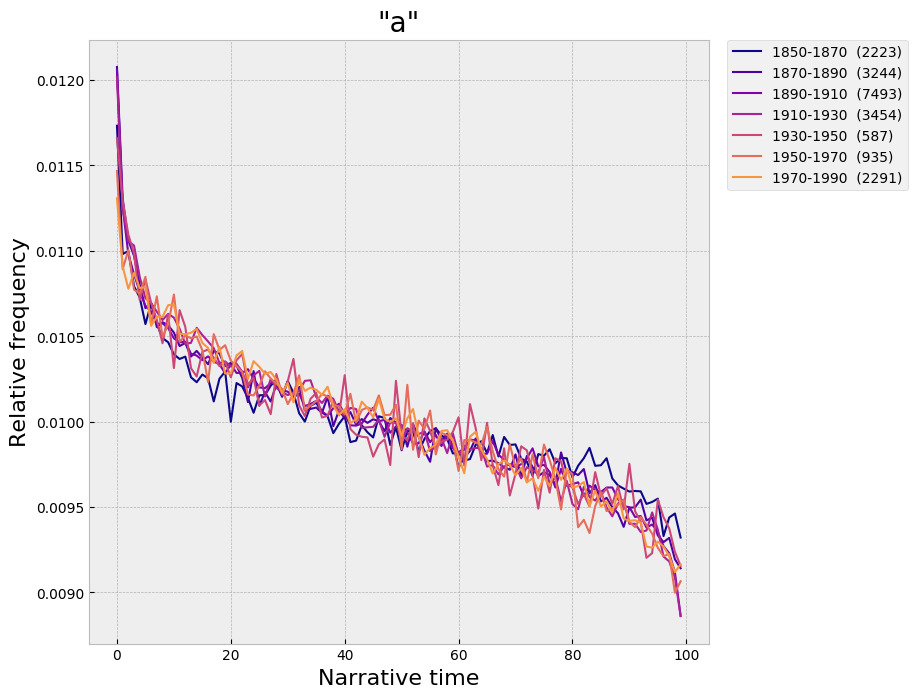

In [78]:
plot_historical_slices('a')

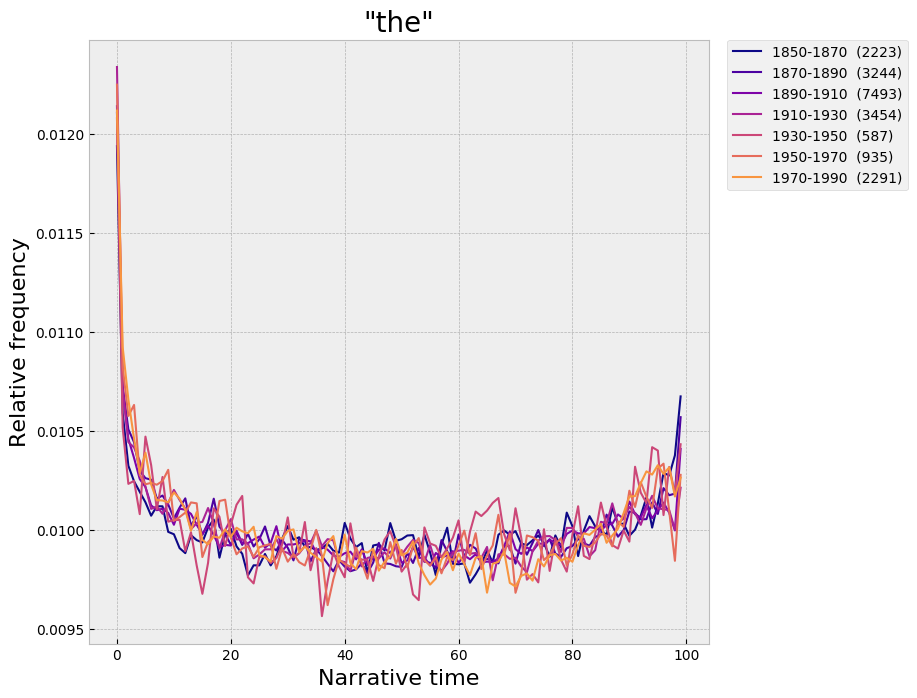

In [62]:
plot_historical_slices('the')

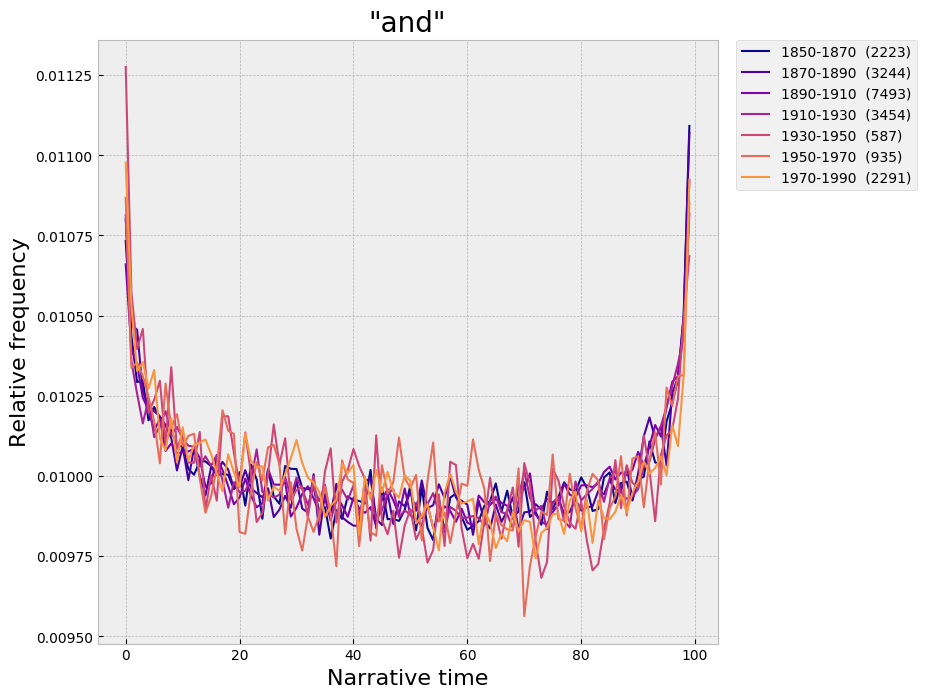

In [55]:
plot_historical_slices('and')

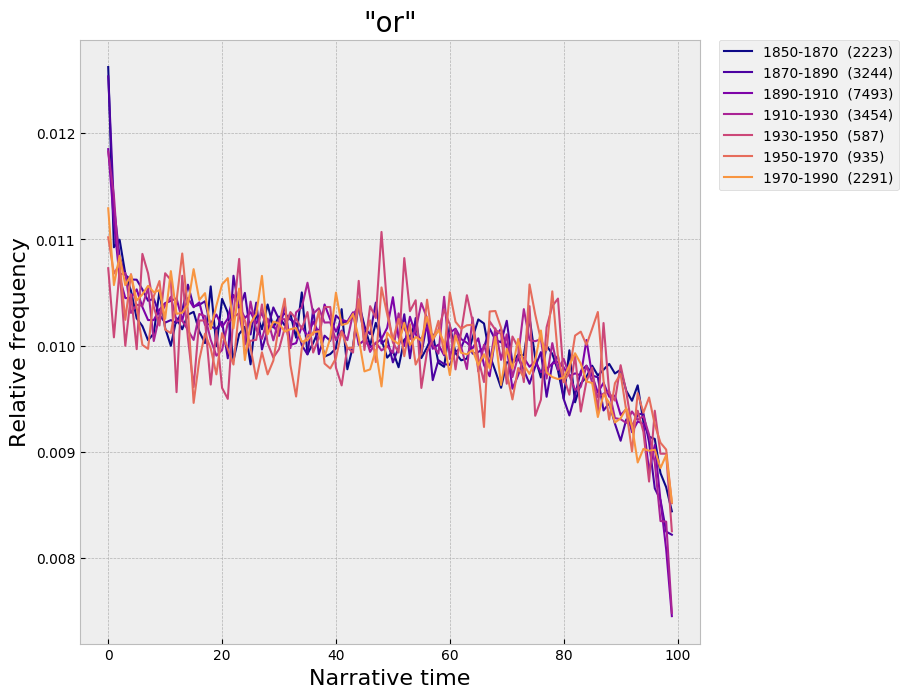

In [56]:
plot_historical_slices('or')

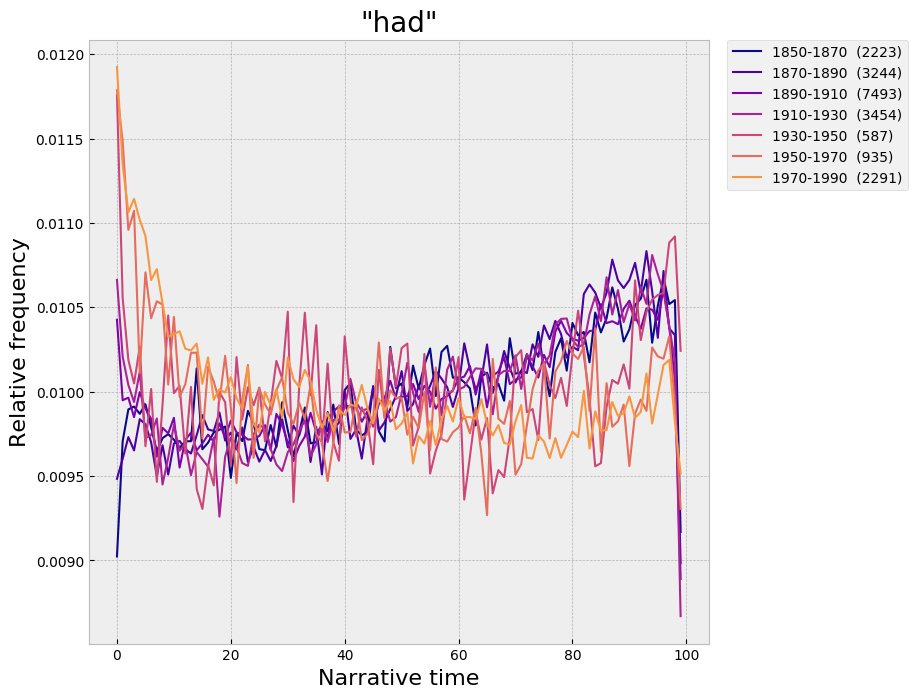

In [54]:
plot_historical_slices('had')

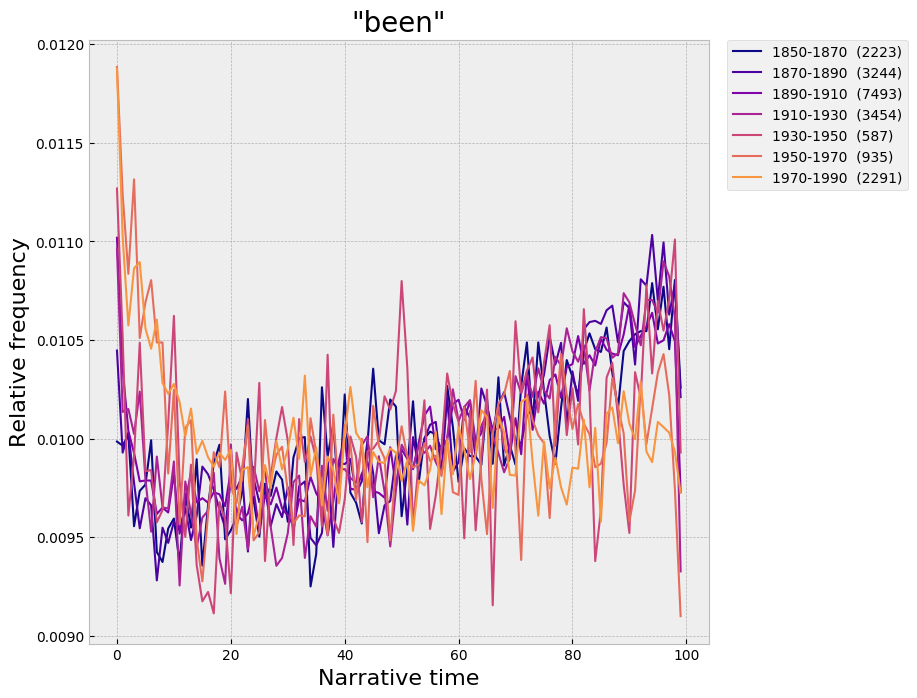

In [115]:
plot_historical_slices('been')

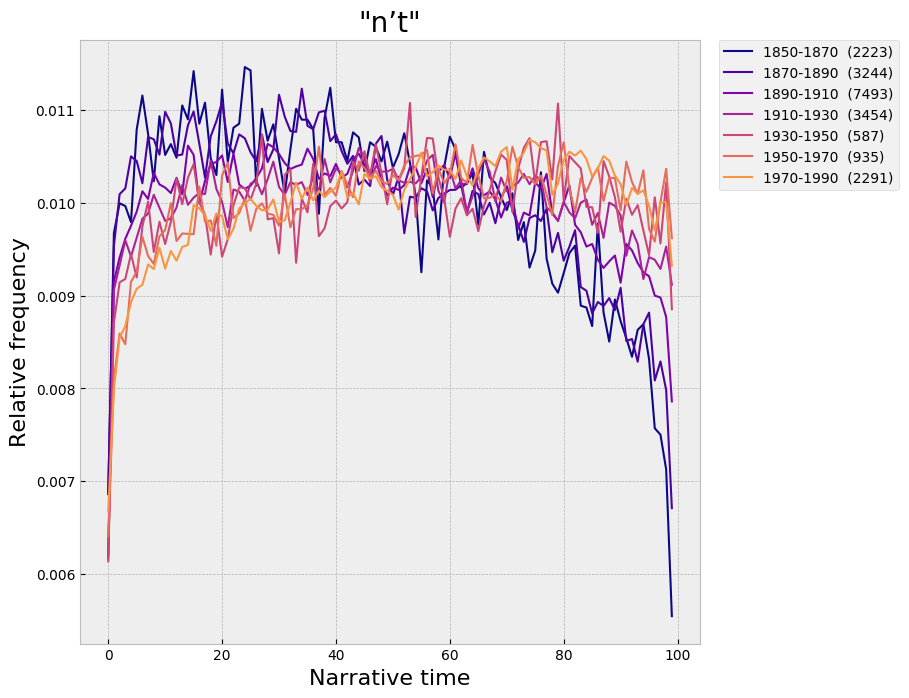

In [116]:
plot_historical_slices('n’t')

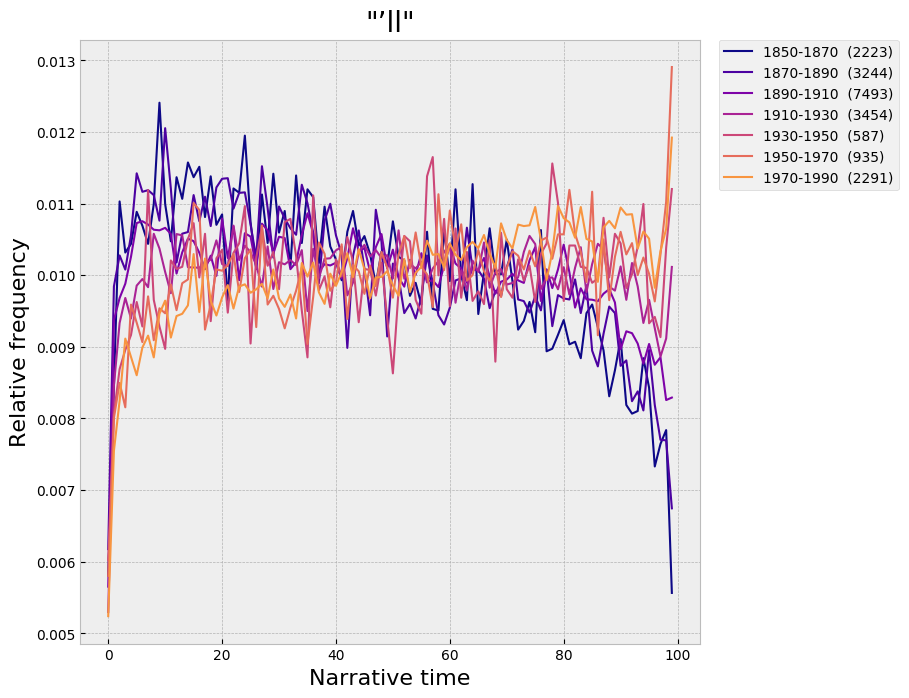

In [117]:
plot_historical_slices('’ll')

In [88]:
totals = Counter()
for counts in tqdm(df.counts):
    for token, bcounts in counts.items():
        totals[token] += sum(bcounts)

100%|██████████| 24984/24984 [00:12<00:00, 2013.16it/s]


In [104]:
totals.most_common(100)

[(',', 135444612),
 ('.', 104878474),
 ('the', 102628505),
 ('and', 56381046),
 ('to', 49860993),
 ('of', 46788953),
 ('a', 41176390),
 ('“', 34817716),
 ('”', 34242163),
 ('i', 33095969),
 ('in', 28357296),
 ('he', 28177773),
 ('was', 24966214),
 ('that', 22892408),
 ('it', 22289992),
 ('you', 21153687),
 ('his', 19358452),
 ('her', 18808178),
 ('she', 17509642),
 ('had', 15712566),
 ('with', 14729033),
 ('for', 14067086),
 ('as', 13613814),
 ('’s', 12674799),
 ('but', 11528928),
 ('?', 11510666),
 ('not', 11384184),
 ('at', 11059125),
 ('on', 11037371),
 ('-', 10315121),
 ('is', 10191895),
 ('him', 9358147),
 ('be', 9279892),
 (';', 9229053),
 ('have', 8668690),
 ('said', 8443672),
 ('my', 8244518),
 ('me', 7953914),
 ('they', 7905189),
 ('n’t', 7763805),
 ('!', 7464345),
 ('from', 7456711),
 ('all', 7215506),
 ('this', 7213821),
 ('—', 7205216),
 ('do', 7002547),
 ('were', 6562940),
 ('so', 6422995),
 ('would', 6378095),
 ('one', 6323121),
 ('by', 6217839),
 ('there', 6113433),
 ('w